In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_trips_1 = pd.read_csv("./trips_1.csv", sep=";")

## Dataframe 

In [18]:
df_trips_1.head()


,id_viaje,origen_viaje,destino_viaje,estado_actual,tipo_vehiculo,nombre_chofer,apellido_chofer,start_date,start_time,end_date,end_time,last_update
0,1013,547,601.0,2.0,1.0,James,Ulrich,17/7/22,18:54,17/7/22,19:45,27/4/23
1,1021,545,601.0,1.0,3.0,Lars,Hetfield,26/1/20,15:57,26/1/20,16:56,28/4/23
2,1029,547,600.0,2.0,3.0,Jason,Rock,11/1/19,13:41,11/1/19,14:12,24/3/23
3,1077,546,601.0,1.0,3.0,Jason,Newsted,10/10/19,14:38,10/10/19,15:22,5/4/23
4,1087,547,600.0,4.0,2.0,Lars,Hetfield,30/7/22,14:53,30/7/22,15:43,9/4/23


### DataFrame Information
You can use the `info()` method to display a summary of the DataFrame's structure and column information.

In [19]:
df_trips_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315 entries, 0 to 8314
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_viaje         8315 non-null   int64  
 1   origen_viaje     8315 non-null   int64  
 2   destino_viaje    8311 non-null   float64
 3   estado_actual    8307 non-null   float64
 4   tipo_vehiculo    8309 non-null   float64
 5   nombre_chofer    8315 non-null   object 
 6   apellido_chofer  8315 non-null   object 
 7   start_date       8315 non-null   object 
 8   start_time       8315 non-null   object 
 9   end_date         8309 non-null   object 
 10  end_time         8315 non-null   object 
 11  last_update      8315 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 779.7+ KB


### Checking Duplicate Values
You can use the `duplicated()` method to identify duplicate values in a specific column of a DataFrame.

In [20]:
df_trips_3 = df_trips_1['id_viaje'].duplicated()
cantidad_duplicados = df_trips_3.sum()
print(cantidad_duplicados)

0


### Checking Null Values

To identify the number of null values in each column of DataFrame `df_trips_1`, you can use the `isnull().sum()` method. The code snippet below demonstrates this:

In [21]:
print(df_trips_1.isnull().sum())


id_viaje           0
origen_viaje       0
destino_viaje      4
estado_actual      8
tipo_vehiculo      6
nombre_chofer      0
apellido_chofer    0
start_date         0
start_time         0
end_date           6
end_time           0
last_update        0
dtype: int64


## Histograms

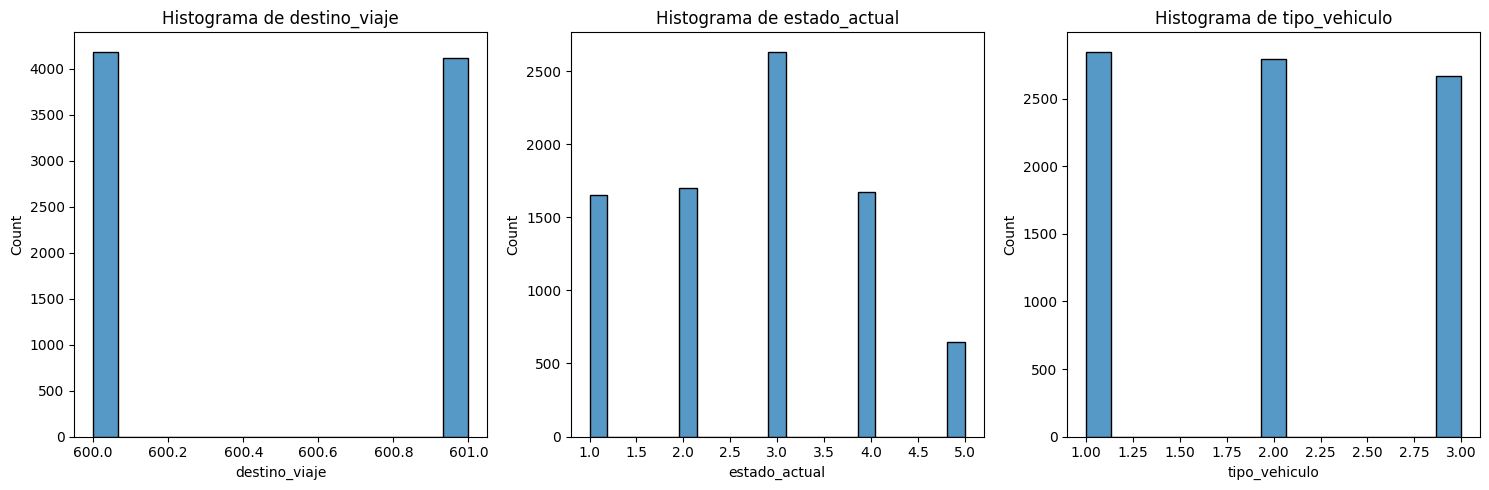

In [22]:
# Create a Figure and a Grid of Subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram of 'destino_viaje' in the first subplot
sns.histplot(data=df_trips_1, x='destino_viaje', ax=axes[0])
axes[0].set_title('Histograma de destino_viaje')

# Histogram of 'estado_actual' in the second subplot
sns.histplot(data=df_trips_1, x='estado_actual', ax=axes[1])
axes[1].set_title('Histograma de estado_actual')

# Histogram of 'tipo_vehiculo' in the third subplot
sns.histplot(data=df_trips_1, x='tipo_vehiculo', ax=axes[2])
axes[2].set_title('Histograma de tipo_vehiculo')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

### number of columns and rows in df_trips_1

In [23]:
df_trips_1.shape

(8315, 12)

## Data Preprocessing: Handling Missing Values

In [24]:
# # Fill null values in 'destino_viaje' with the median
df_trips_1["destino_viaje"].fillna(df_trips_1["destino_viaje"].median(), inplace=True)

# Fill null values in 'estado_actual' with the median
df_trips_1["estado_actual"].fillna(df_trips_1["estado_actual"].median(), inplace=True)

# Fill null values in 'tipo_vehiculo' with the median
df_trips_1["tipo_vehiculo"].fillna(df_trips_1["tipo_vehiculo"].median(), inplace=True)

# Drop rows with null values in 'end_date'
df_trips_1 = df_trips_1.dropna(subset=["end_date"])

In [25]:
print(df_trips_1.isnull().sum())


id_viaje           0
origen_viaje       0
destino_viaje      0
estado_actual      0
tipo_vehiculo      0
nombre_chofer      0
apellido_chofer    0
start_date         0
start_time         0
end_date           0
end_time           0
last_update        0
dtype: int64


## Data Summary: Descriptive Statistics

In [26]:
print(df_trips_1.describe())

           id_viaje  origen_viaje  destino_viaje  estado_actual  tipo_vehiculo
count  8.309000e+03   8309.000000    8309.000000    8309.000000    8309.000000
mean   1.403379e+06    545.004333     600.495968       2.754844       1.978457
std    1.061796e+08      1.423961       0.500014       1.204810       0.814170
min    9.000000e+00    543.000000     600.000000       1.000000       1.000000
25%    7.772600e+04    544.000000     600.000000       2.000000       1.000000
50%    1.523520e+05    545.000000     600.000000       3.000000       2.000000
75%    2.279480e+05    546.000000     601.000000       4.000000       3.000000
max    9.678568e+09    547.000000     601.000000       5.000000       3.000000


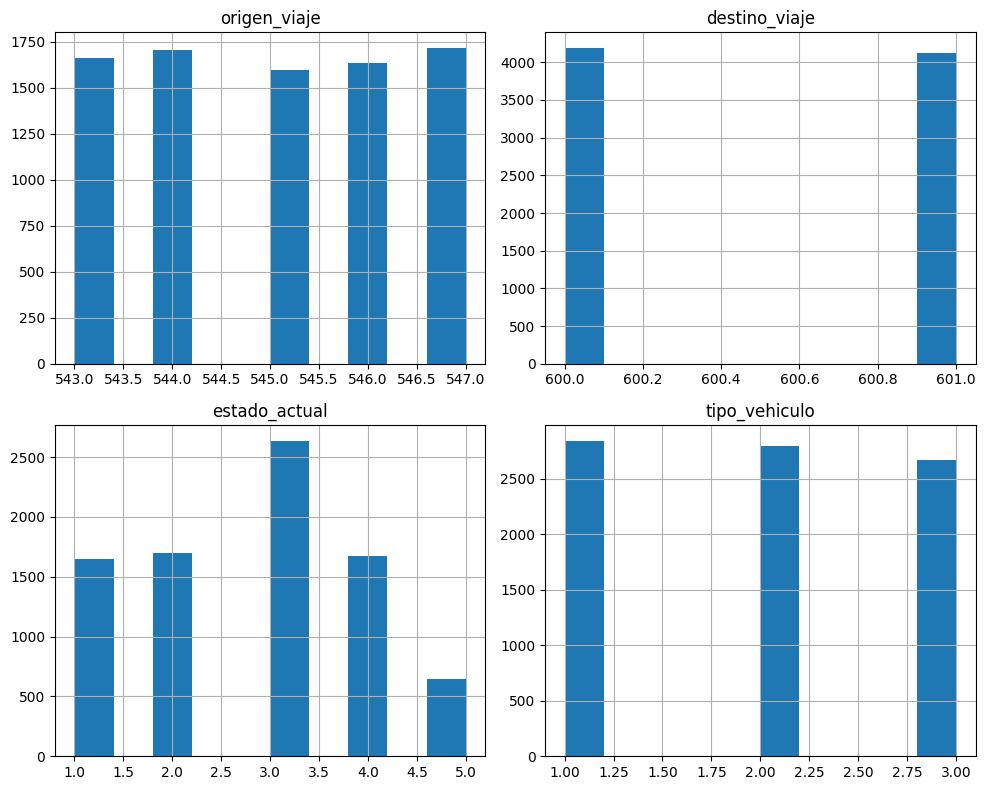

In [27]:
# Histogramas

# Exclude"id_viaje" 
columns_to_include = df_trips_1.columns.drop('id_viaje')

df_trips_1[columns_to_include].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [28]:
pd_locaciones = pd.read_csv("./locaciones.csv", sep=";")
pd_locaciones.head()

,id,nombre,lat,long
0,543,Base A,"-34,482501","-58,534965"
1,544,Base B,"-34,680268","-58,552609"
2,545,Base C,"-34,723489","-58,358976"
3,546,Central,"-34,697401","-58,401234"
4,547,Base SM,"-34,7041564","-58,418726"


In [29]:
print(pd_locaciones.isnull().sum())

id        0
nombre    0
lat       0
long      0
dtype: int64
